In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
df=pd.read_csv("brca.csv")
df.head()

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


In [5]:
print(df.columns)

Index(['Unnamed: 0', 'x.radius_mean', 'x.texture_mean', 'x.perimeter_mean',
       'x.area_mean', 'x.smoothness_mean', 'x.compactness_mean',
       'x.concavity_mean', 'x.concave_pts_mean', 'x.symmetry_mean',
       'x.fractal_dim_mean', 'x.radius_se', 'x.texture_se', 'x.perimeter_se',
       'x.area_se', 'x.smoothness_se', 'x.compactness_se', 'x.concavity_se',
       'x.concave_pts_se', 'x.symmetry_se', 'x.fractal_dim_se',
       'x.radius_worst', 'x.texture_worst', 'x.perimeter_worst',
       'x.area_worst', 'x.smoothness_worst', 'x.compactness_worst',
       'x.concavity_worst', 'x.concave_pts_worst', 'x.symmetry_worst',
       'x.fractal_dim_worst', 'y'],
      dtype='object')


In [7]:
df = df.drop(columns=["Unnamed: 0"])
df

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.147400,0.2149,0.06879,...,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873,M
565,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.138900,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115,M
566,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.097910,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637,M
567,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.053020,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820,M


In [11]:
X = df.drop(columns=["y"])  
y = df["y"]  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.80)  
X_pca = pca.fit_transform(X_scaled)

print(f"Number of PCA components chosen: {X_pca.shape[1]}")
print(f"Explained variance ratio: {sum(pca.explained_variance_ratio_):.2f}")

Number of PCA components chosen: 5
Explained variance ratio: 0.85


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_pca_train, X_pca_test, _, _ = train_test_split(X_pca, y, test_size=0.2, random_state=42)

svm_original = SVC(kernel="linear", random_state=42)
svm_pca = SVC(kernel="linear", random_state=42)

svm_original.fit(X_train, y_train)
svm_pca.fit(X_pca_train, y_train)

SVC(kernel='linear', random_state=42)

In [15]:
y_pred_original = svm_original.predict(X_test)
y_pred_pca = svm_pca.predict(X_pca_test)

accuracy_original = accuracy_score(y_test, y_pred_original)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print(f"Accuracy with Original Features: {accuracy_original:.2f}")
print(f"Accuracy with PCA Features: {accuracy_pca:.2f}")

Accuracy with Original Features: 0.96
Accuracy with PCA Features: 0.95


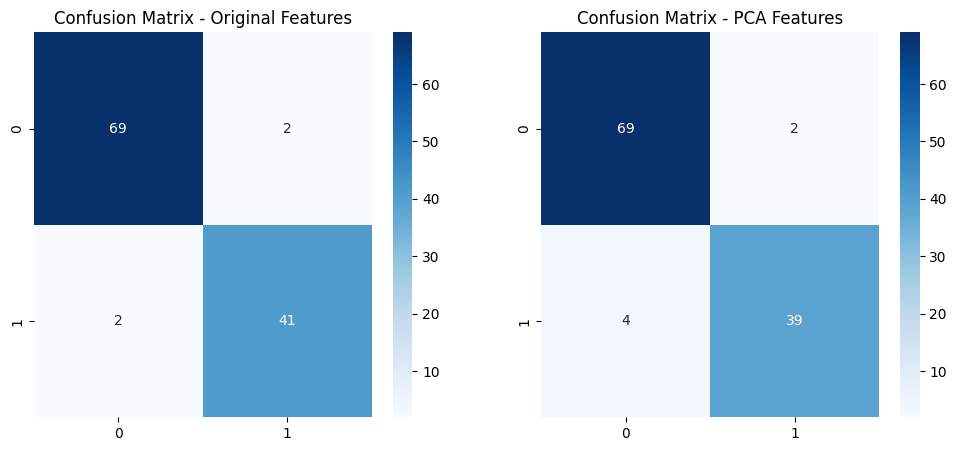

In [17]:
cm_original = confusion_matrix(y_test, y_pred_original)
cm_pca = confusion_matrix(y_test, y_pred_pca)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_original, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Original Features")

plt.subplot(1, 2, 2)
sns.heatmap(cm_pca, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - PCA Features")

plt.show()

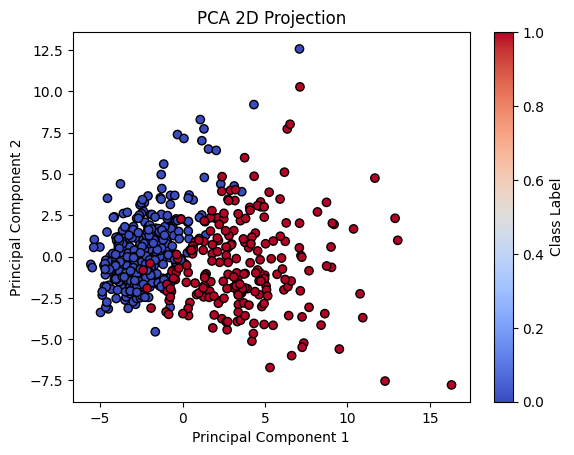

PCA Trade-offs:
- PCA reduces dimensionality, making training faster.
- A small drop in accuracy is expected since PCA loses some information.
- If accuracy with PCA is almost the same, then PCA is beneficial because it simplifies computation.



In [31]:
label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y)  

scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_numeric, cmap="coolwarm", edgecolors="k")

plt.title("PCA 2D Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label="Class Label")
plt.show()

print("""PCA Trade-offs:
- PCA reduces dimensionality, making training faster.
- A small drop in accuracy is expected since PCA loses some information.
- If accuracy with PCA is almost the same, then PCA is beneficial because it simplifies computation.
""")